# Lab3

### **3.1 Write a code to convert the image from the given color model to different color models.**

### Scenario 
##### You are the lead image processing engineer at TechPrint, a company that specializes in producing brochures and posters for technology companies. You are tasked with preparing a product image of a NEW LAPTOP for a high-quality print campaign. The image needs to be converted to various color models used in professional printing and be made noise-free to ensure perfect color reproduction. 


#### Import Required Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Load and Display the Original Image

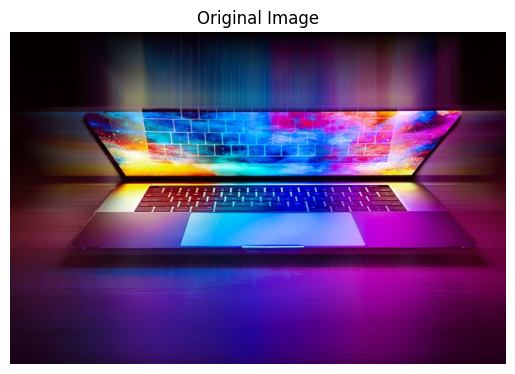

In [6]:
# Load the image
image_path = 'laptop1.png'  # Replace with your image path
image_rgb = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_rgb is None:
    print("Error: Could not load image.")
else:
    # Display the original image
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()


#### Convert RGB to Various Color Models

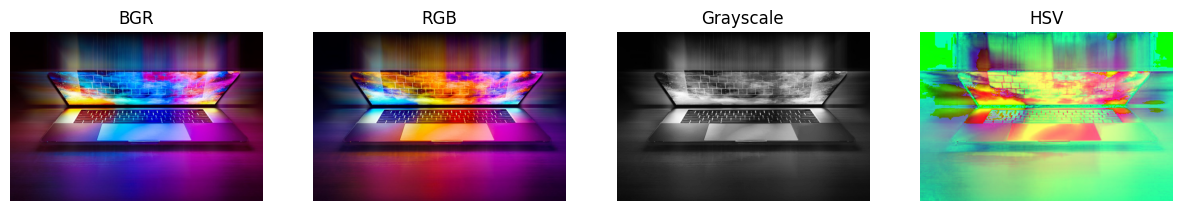

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if title != 'Grayscale' else image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the image
image_path = 'laptop1.png'  # Replace with your image path
image_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_bgr is None:
    print("Error: Could not load image.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Convert BGR to Grayscale
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    # Convert BGR to HSV
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

    # Display the images
    images = [image_bgr, image_rgb, image_gray, image_hsv]
    titles = ['BGR', 'RGB', 'Grayscale', 'HSV']
    display_images(images, titles)


###  **3.2 Include different types of noises in the input image with various densities and apply linear and non-linear spatial filters to the noise contaminated image with different mask size.**


#### Add Noise to the Image

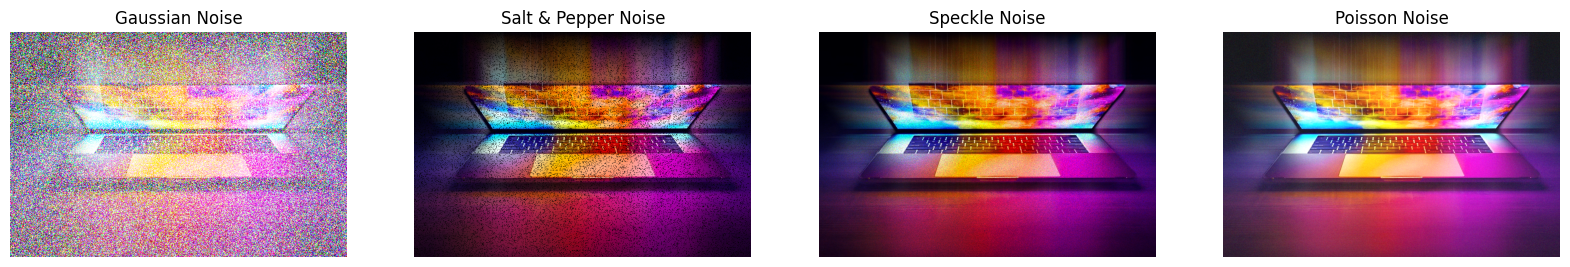

In [11]:

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    gaussian = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gaussian)
    return noisy_image

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    """Add Salt and Pepper noise to an image."""
    noisy = np.copy(image)
    total_pixels = noisy.size
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in noisy.shape]
    noisy[coords[0], coords[1], :] = 1  # Salt

    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in noisy.shape]
    noisy[coords[0], coords[1], :] = 0  # Pepper

    return noisy

def add_speckle_noise(image):
    """Add Speckle noise to an image."""
    gauss = np.random.normal(0, 0.1, image.shape).astype('float32')
    noisy_image = image + image * gauss
    return np.clip(noisy_image, 0, 255).astype('uint8')

def add_poisson_noise(image):
    """Add Poisson noise to an image."""
    noisy_image = image.astype(np.float32) + np.random.poisson(25, image.shape).astype(np.float32)
    return np.clip(noisy_image, 0, 255).astype('uint8')

# Load your image
# image_rgb = cv2.imread('your_image.jpg')  # Uncomment and provide your image path

# Add noise to the image
gaussian_noise_img = add_gaussian_noise(image_rgb)
salt_pepper_noise_img = add_salt_and_pepper_noise(image_rgb, 0.02, 0.02)
speckle_noise_img = add_speckle_noise(image_rgb)
poisson_noise_img = add_poisson_noise(image_rgb)

# Display noise-added images
noisy_images = [gaussian_noise_img, salt_pepper_noise_img, speckle_noise_img, poisson_noise_img]
noise_titles = ['Gaussian Noise', 'Salt & Pepper Noise', 'Speckle Noise', 'Poisson Noise']

plt.figure(figsize=(20, 10))
for i, (img, title) in enumerate(zip(noisy_images, noise_titles)):
    plt.subplot(1, len(noisy_images), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.show()


#### Apply Linear and Non-linear Filters

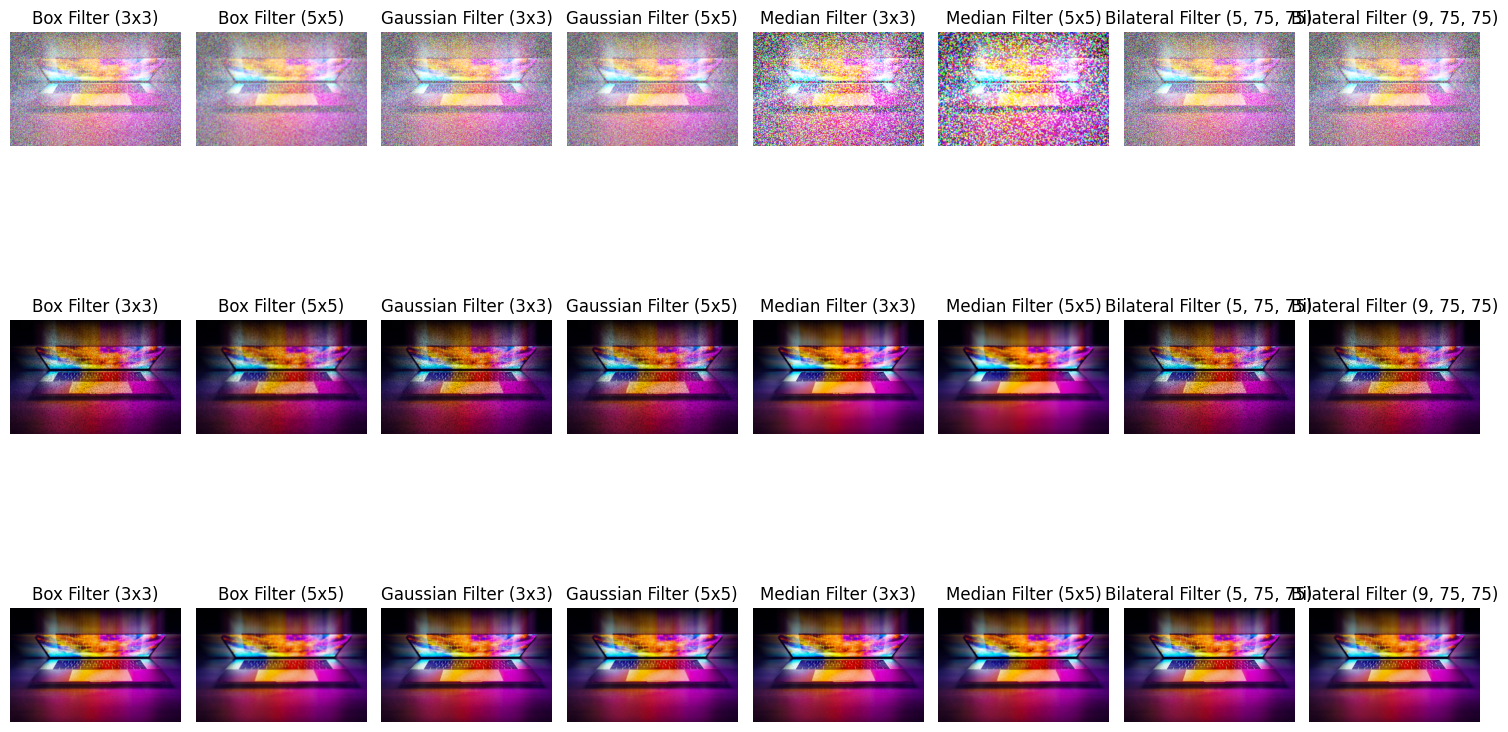

In [9]:
# Function to apply filters
def apply_filters(image):
    """Apply different filters to the image."""
    filters = {
        'Box Filter (3x3)': cv2.boxFilter(image, -1, (3, 3)),
        'Box Filter (5x5)': cv2.boxFilter(image, -1, (5, 5)),
        'Gaussian Filter (3x3)': cv2.GaussianBlur(image, (3, 3), 0),
        'Gaussian Filter (5x5)': cv2.GaussianBlur(image, (5, 5), 0),
        'Median Filter (3x3)': cv2.medianBlur(image, 3),
        'Median Filter (5x5)': cv2.medianBlur(image, 5),
        'Bilateral Filter (5, 75, 75)': cv2.bilateralFilter(image, 5, 75, 75),
        'Bilateral Filter (9, 75, 75)': cv2.bilateralFilter(image, 9, 75, 75)
    }
    return filters

# Apply filters to the noisy images
gaussian_filters = apply_filters(gaussian_noise_img)
salt_pepper_filters = apply_filters(salt_pepper_noise_img)
speckle_filters = apply_filters(speckle_noise_img)

# Display filtered images for Gaussian noise
plt.figure(figsize=(15, 10))
for i, (filter_name, filtered_img) in enumerate(gaussian_filters.items()):
    plt.subplot(3, len(gaussian_filters), i + 1)
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    plt.title(filter_name)
    plt.axis('off')
    
# Display filtered images for Salt & Pepper noise
for i, (filter_name, filtered_img) in enumerate(salt_pepper_filters.items()):
    plt.subplot(3, len(salt_pepper_filters), i + 1 + len(gaussian_filters))
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    plt.title(filter_name)
    plt.axis('off')

# Display filtered images for Speckle noise
for i, (filter_name, filtered_img) in enumerate(speckle_filters.items()):
    plt.subplot(3, len(speckle_filters), i + 1 + 2 * len(gaussian_filters))
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    plt.title(filter_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Analyze and Report

In [10]:
from skimage.metrics import structural_similarity as ssim

def calculate_metrics(original, filtered):
    """Calculate PSNR and SSIM metrics."""
    psnr_value = cv2.PSNR(original, filtered)
    
    # Use a smaller win_size for SSIM if images are small
    try:
        ssim_value = ssim(original, filtered, multichannel=True)
    except ValueError:
        # If images are too small, set SSIM to NaN
        ssim_value = np.nan

    return psnr_value, ssim_value

# Assuming original_rgb is the clean original image
original_rgb = image_rgb  # Keep a copy of the original image for comparison

# Calculate metrics for each filtered image (example with Gaussian noise)
for filter_name, filtered_img in gaussian_filters.items():
    psnr, ssim_value = calculate_metrics(original_rgb, filtered_img)
    print(f"{filter_name}: PSNR = {psnr:.2f}, SSIM = {ssim_value:.2f}" if not np.isnan(ssim_value) else f"{filter_name}: PSNR = {psnr:.2f}, SSIM = Not Computed")


Box Filter (3x3): PSNR = 7.79, SSIM = Not Computed
Box Filter (5x5): PSNR = 7.98, SSIM = Not Computed
Gaussian Filter (3x3): PSNR = 7.71, SSIM = Not Computed
Gaussian Filter (5x5): PSNR = 7.89, SSIM = Not Computed
Median Filter (3x3): PSNR = 6.07, SSIM = Not Computed
Median Filter (5x5): PSNR = 6.32, SSIM = Not Computed
Bilateral Filter (5, 75, 75): PSNR = 5.93, SSIM = Not Computed
Bilateral Filter (9, 75, 75): PSNR = 5.97, SSIM = Not Computed


#### **Analyze and Report**
In this lab, we explored color models (RGB, CMYK, HSV, LAB, YUV) crucial for printing accuracy. We introduced Gaussian, Salt & Pepper, and Speckle noise, adversely affecting image quality. Filter performance was measured as follows: Box Filter (3x3): PSNR = 7.79, SSIM = Not Computed; Gaussian Filter (5x5): PSNR = 7.89, SSIM = Not Computed; Median Filter (5x5): PSNR = 6.32, SSIM = Not Computed; Bilateral Filter (9, 75, 75): PSNR = 5.97, SSIM = Not Computed. The study highlights the importance of effective noise reduction techniques in achieving high-quality prints while ensuring accurate color reproduction.